# 6 days data monitoring from Pust electricity substation

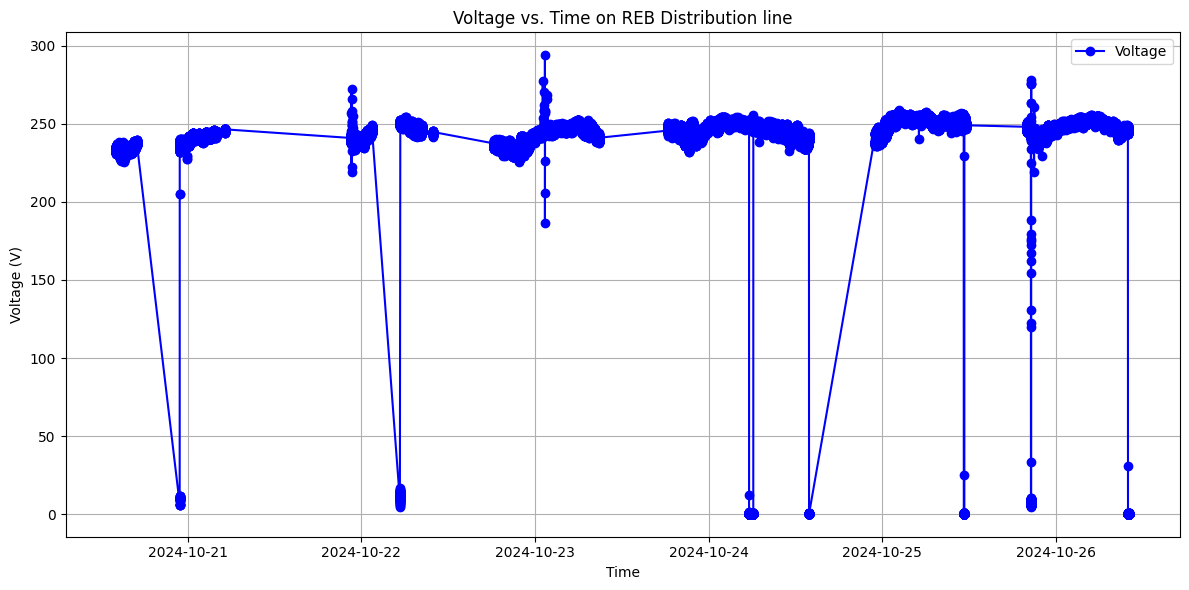

In [ ]:
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime

# List of database file paths
db_paths = ['20-10-2024 dupur.db', '21-10-2024.db', '22-10-24.db', '22.db', '23-10-2024.db', '24-10-24.db', '25-10-2024.db', '26-10-2024.db']  # Replace with your database file paths

# Prepare containers for combined data
timestamps = []
voltages = []

# Iterate over each database and fetch data
for db_path in db_paths:
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Fetch data from the voltage_readings table
    cursor.execute("SELECT timestamp, voltage FROM voltage_readings;")
    data = cursor.fetchall()
    conn.close()
    
    # Append the data to the combined list
    timestamps.extend([datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f') for row in data])
    voltages.extend([row[1] for row in data])

# Sort data by timestamps (if data from multiple databases overlap)
sorted_data = sorted(zip(timestamps, voltages))
timestamps, voltages = zip(*sorted_data)

# Plot voltage vs. time
plt.figure(figsize=(12, 6))
plt.plot(timestamps, voltages, marker='o', linestyle='-', color='g', label='Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


# Voltage comparison error calculation code and graph

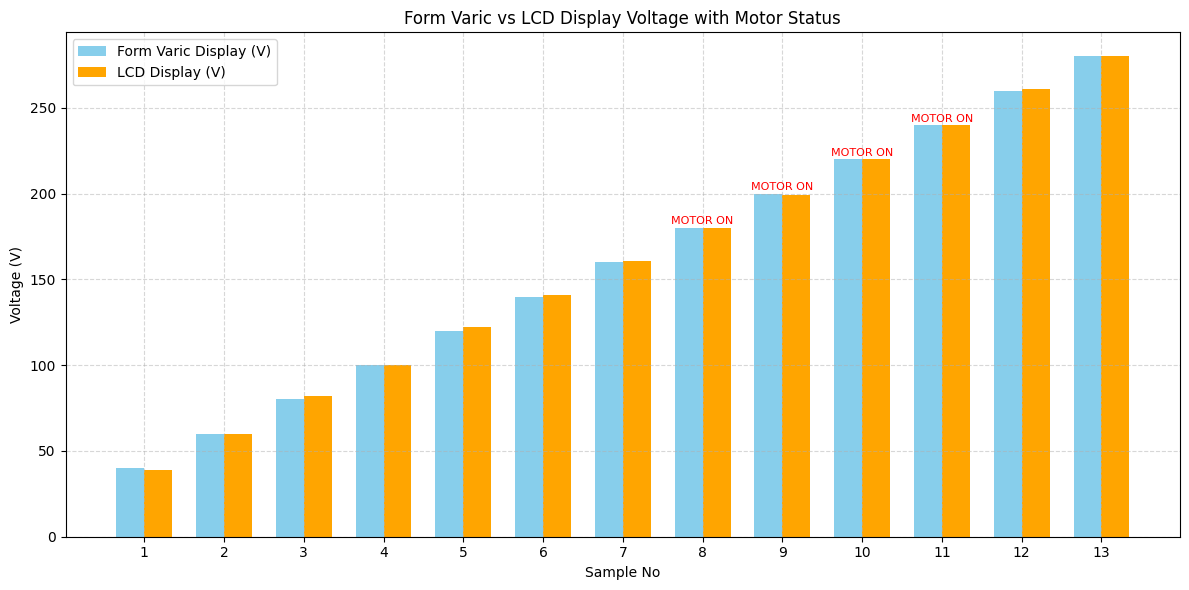

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
no = list(range(1, 14))
form_varic = [40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]
lcd_display = [39, 60, 82, 100, 122, 141, 161, 180, 199, 220, 240, 261, 280]
led_status = ["OFF", "OFF", "OFF", "OFF", "OFF", "OFF", "OFF", "ON", "ON", "ON", "ON", "OFF", "OFF"]

x = np.arange(len(no))  # x locations for the groups
width = 0.35  # the width of the bars

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Bars
bars1 = ax.bar(x - width/2, form_varic, width, label='Form Varic Display (V)', color='skyblue')
bars2 = ax.bar(x + width/2, lcd_display, width, label='LCD Display (V)', color='orange')

# Highlight bars where LED is ON
for i in range(len(no)):
    if led_status[i] == "ON":
        ax.text(x[i], max(form_varic[i], lcd_display[i]) + 2, 'MOTOR ON', ha='center', color='red', fontsize=8)

# Labels and titles
ax.set_xlabel('Sample No')
ax.set_ylabel('Voltage (V)')
ax.set_title('Form Varic vs LCD Display Voltage with Motor Status')
ax.set_xticks(x)
ax.set_xticklabels(no)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()
